# ASSIGNMENT 7 - INTRO TO MACHINE LEARNING | Convolutional Neural Network | Recurrent Neural Network 

> **FULL MARKS = 100**



**Note:** To submit the assignment, please follow the same steps as in assignments 1-6.

In this assignemnt, we will go through two deep learning examples, one relates to images classification and another relates to text classification. You will get familiar with two kinds of frequently used deep learning neural networks, Convolutional Neural Network and Recurrent Neural Network. Based on what you learned from the classes and examples given, you are expected to finish two small tasks using such models. Including create deep learning model, prepare the data, training, testing and evaluation. 

1. **Convolutional Neural Networks (Image Classification)| SCORE : 50**

2. **Recurrent Neural Network (Text Classification) | SCORE : 50**
      


In [1]:
""""
!!!!!!!!! WARNING !!!!!!!!!

BEFORE STARTING THIS ASSIGNMENT PLEASE CHANGE YOUR RUNTYPE ON GOOGLE COLAB TO SPEED UP EXECUTION

1. Go to Runtime
2. Go to change runtime type
3. Select Hardware Accelerator as GPU and SAVE

"""
print()

In [2]:
# Since we will be working in larger files it is wise to load google drive
# We assume your google drive is not full yet
# When asked open link and allow colabs to open your drive
# Then copy authentication code and authorize

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# We will be running this notebook multiple time
# So it is not wise to download data everytime we run
# Follow these steps

# Make sure you are logged in with gmail account
# Create a folder name "ASSIGN7_Data"
# Open following google drive link
# Or you can download file from canvas as well
# It is shared for view only, make a copy of individual file in your google drive folder(ASSIGN7_Data) that you have recently created
# Note 
"""
!! make sure you achieve above instruction
LINK : 
https://drive.google.com/drive/folders/1gmUwWYU-TfXzZl3Ne2d4sf4VZk-pmFbg?usp=sharing
"""
print()

In [4]:
!cp /content/drive/MyDrive/ASSIGN7_Data/* ./

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!unzip -q food101small.zip

replace __MACOSX/._food101small? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [7]:
# Lets get rid of .zip

In [8]:
!rm -rf *.zip

In [9]:
# Lets see what we have

In [10]:
!ls

cleaned_tweets_1point6_million.csv  drive	  __MACOSX
corona_march15_2020_tweets.csv	    food101small  sample_data


In [11]:
#food101small is a dataset for our convolution nn task
#.csv files are for our NLP task

In [12]:
# Lets see if you have loaded gpu or not
!nvidia-smi

Fri Apr 23 03:58:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
# In this assignment we will explore following two important field of deep learning
# 1. Computer Vision / CV (Convolution Neural Network - Image Classification)
# 2. Natural Language Processing / NLP (Natural Language Processing - Text Classification)

# You will be given enough references
# We encourage you to put some effort from your side

In [14]:
# Generally when we implement neural network there are fundamental major steps
"""
STEP 1: DATA
        - know your data
        - get your data
        - create data loading pipe - line
          - Load all data in memory (If your entire dataset is smaller and can fit in memory, usually your data doesn't fit in memory)
          - Load part of data(from disk) to memory(generally this is the case) and create pool of loading and data feeding to your model
          - If necessary implement data transformation (resize, standardize etc.)
          - Data Augmentation for better results(Data Augmentation is not done in evaluation set (test or val))

STEP 2: CREATE MODEL
        FOR THIS PART YOU WILL BE FOLLOWING AN EXAMPLE FROM TENSORFLOW ITSELF
        Note : For this we will use tensorflow.keras api, (note: version of tensorflow we are using is 2.0)
        - Define network architecture
        - Compile your model
        - Define Loss(Objective) Function
        - Define Metrics
        - Define Optimizer
        - ..... (There are many more details but we will skip other for now)

STEP 3: TRAIN MODEL
        FOR THIS PART YOU WILL BE FOLLOWING AN EXAMPLE FROM TENSORFLOW ITSELF
        - Define trainig strategies, (learning_rate, batch_size, epoch_size, .....)
        - Define a training function(or loop) or implement available .fit function
        - Evaluate model on test set after one cycle on train is done(that is called as 1 epoch)

STEP 4: DEPLOY MODEL
        - If your model is good you can deploy your model for application purpose
"""       
print()

# In following Section We will be following above pattern
# However, we will not do step 4 for CV
# But, we will do step 4 for very interesting problem while doing NLP in later section

# Convolution Neural Network | Image Classification

In [15]:
# Before Starting on convolution neural network we request you to review class lectures
# Instead of directly jumping to convolution neural network we will first look an example for image classification
# using tensorflow2.0
# You have already seen the dataset, I hope this makes things little bit easier
# Following is a reference link
# https://www.tensorflow.org/tutorials/keras/classification

## STEP 1 : Prepare the Data

In [16]:
# For this Task we will be using a dataset called as FOOD101
# You can find this dataset 
# However, the one that we use here is a smaller version of food101
# We sample random 10 classes for this assignment
# Here's the reference of FOOD101 dataset original paper
"""
@inproceedings{bossard14,
  title = {Food-101 -- Mining Discriminative Components with Random Forests},
  author = {Bossard, Lukas and Guillaumin, Matthieu and Van Gool, Luc},
  booktitle = {European Conference on Computer Vision},
  year = {2014}
}
"""
print()

In [17]:
# Lets load tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

In [18]:
## Create Dataloading Pipeline
from pathlib import Path
data_dir = Path('./food101small/')
train_dir = Path('./food101small/train')
test_dir = Path('./food101small/test')

print(f"total images \t: {len(list(data_dir.glob('*/*/*.jpg')))}")
print(f"train images \t: {len(list(data_dir.glob('train/*/*.jpg')))}")
print(f"test images \t: {len(list(data_dir.glob('test/*/*.jpg')))}")
print(f"num classes \t: {len(list(data_dir.glob('train/*')))}")
print("\nClasses")

CLASS_NAMES = np.array([i.name for i in data_dir.glob('train/*')])

for i,cls in enumerate(CLASS_NAMES):
  print(f'{i}.{cls}')

total images 	: 10000
train images 	: 9000
test images 	: 1000
num classes 	: 10

Classes
0.beef_carpaccio
1.baklava
2.bibimbap
3.breakfast_burrito
4.bread_pudding
5.beet_salad
6.apple_pie
7.beef_tartare
8.baby_back_ribs
9.beignets


In [19]:
# Lets create a data generator
# We do 1./255 to convert image pixel 0-255(uint8) to 0-1(float)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [20]:
image_count = len(list(data_dir.glob('train/*/*.jpg')))
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [21]:
# We will create our train_data_generator using following lines of code
# directory is the path to our directory which is food101small
# batch_size is number of images that will be loaded at one step each time
# Shuffle True means we will shuffle dataset and feed randomly
# Since our image sizes are different we need some standard image size we need target size of fix height and width
# classes refers to the class names
train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))


# Now let us create test data generator
test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle = True,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    classes = list(CLASS_NAMES))

Found 9003 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [22]:
# This is a helper function
# Reference : https://www.tensorflow.org/tutorials/keras/classification
# We will use this function to show random 100 images
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

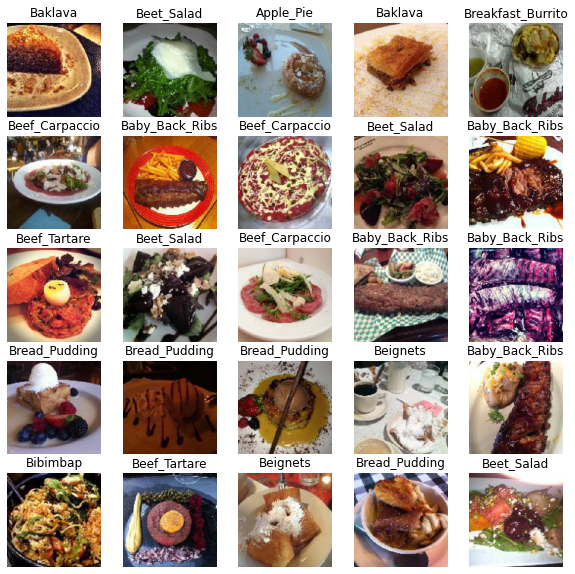

In [23]:
# Let us see random images in our training data
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

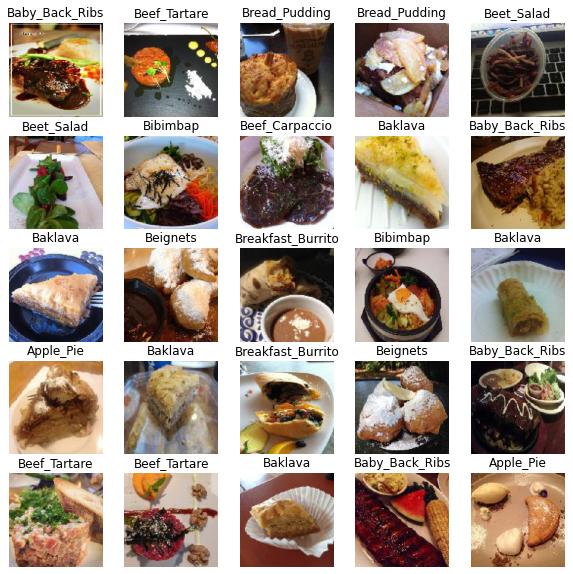

In [24]:
# Let us see random images in our test data
image_batch, label_batch = next(test_data_gen)
show_batch(image_batch, label_batch) 

In [25]:
# But our image_generator for training is not good
# One very important technique to improve our model is to use augmented images
# Augmentation refers to random image transformation techniques
# To know more you can study following link
# https://medium.com/@ODSC/image-augmentation-for-convolutional-neural-networks-18319e1291c

# Let us change our train_data generator

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale = 1/255.,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True)

train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 9003 images belonging to 10 classes.


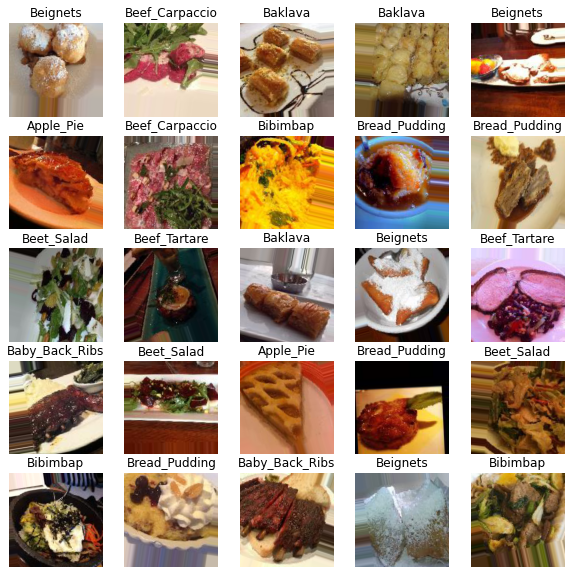

In [26]:
# Now let us see what happens after augmentation
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [27]:
# Now before moving forward lets see the nature of our training data
# As you might have noticed we can get first batch of images using following lines of code
image_batch, label_batch = next(train_data_gen)

# Or you can call it 
xtrain, ytrain = next(train_data_gen)

In [28]:
# Lets see the type of our data
print(f'xtrain and ytrain types : {type(xtrain), type(ytrain)}')
print(f'xtrain and ytrain shapes : {xtrain.shape,ytrain.shape}')

xtrain and ytrain types : (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)
xtrain and ytrain shapes : ((32, 224, 224, 3), (32, 10))


(224, 224, 3)


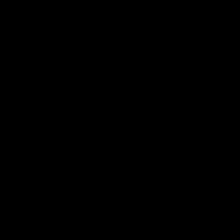

In [29]:
# So what is this shape? You might wonder
# xtrain has a shape of (32, 224, 224, 3)
# Here 32 means batch, number of images per time
# 224,224 is dimension of image that is height and width
# Similarly xtrai has 3 at last what does this mean??
# This means our image has 3 layers of 224x224 matrix stacked together
# Which are called as color channel(RGB)

# To make things clear lets see one by one
# I will import a library called as pillow this will help us visualize image 
from PIL import Image
# Lets take our first image
print(xtrain[0].shape)
Image.fromarray((xtrain[0]).astype(np.uint8))

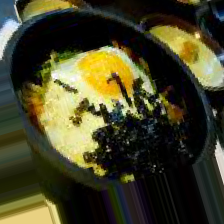

In [30]:
# Oh!! wait we forgot to upscale back to 255 (we rescaled down to 0-1 previously)
Image.fromarray((xtrain[0]*255.).astype(np.uint8))

In [31]:
# Now let see first layer of first image
# Here is the trick
# xtrain[dim0,dim1,dim2,dim3]
# if you use dim0 = 0, eg. above case xtrain[0], only dim0 it means first image
# if you use dim0 = 0:5 eg. xtrain[0:5] first 5 images
# if you use dim0 = :10 eg. xtrain[:10] first 10 images
# if you use dim0 = 10: eg. xtrain[10:] except first 10 images take all
# if you use dim0 = -10: eg. xtrain[-10:] last 10 images and so on

# This is applicable to all dimension

# Now to take first layer 'R' from RGB from first image we do
# Note:, if you just mention ':' this means all
print(xtrain[0,:,:,0].shape) # this is R layer of first image
firstimage = (xtrain[0] * 255.).astype(np.uint8)

(224, 224)


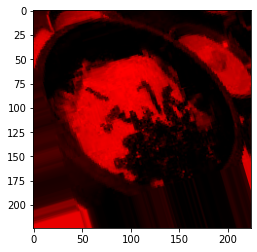

In [32]:
# To visualize Red channel we need to do some techniques
red = np.zeros(firstimage.shape).astype(np.uint8)
red[:,:,0] = firstimage[:,:,0]
plt.imshow(red)

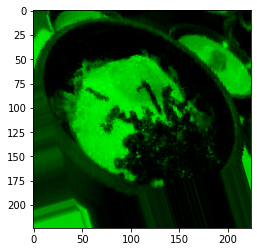

In [33]:
# To visualize Red channel we need to do some techniques
green = np.zeros(firstimage.shape).astype(np.uint8)
green[:,:,1] = firstimage[:,:,1]
plt.imshow(green)

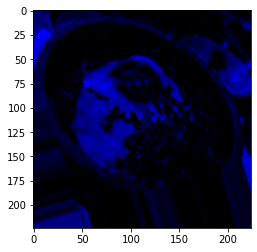

In [34]:
# To visualize Red channel we need to do some techniques
blue = np.zeros(firstimage.shape).astype(np.uint8)
blue[:,:,2] = firstimage[:,:,2]
plt.imshow(blue)

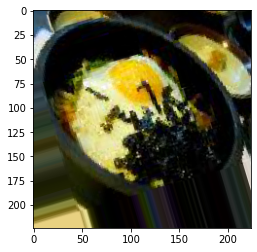

In [35]:
# Now when you visualize an image you will see mixed combinations of all those channels
# and see following
original = red + green + blue
plt.imshow(original)

In [36]:
# Important take away
# (32,224, 224,3) represent one trainnig sample for our model
# Nubmer of features we have per sample is 224*224*3 = 150528

In [37]:
# Now lets have a look in our ytrain
ytrain.shape

(32, 10)

In [38]:
# So it is no clear that we have 32 samples 
# Here 10 represents number of classes we have but why 10??

# Lets see first ytrain
ytrain[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
# weird?? only one '1' and rest 0
# Let's see what position it is at
np.argmax(ytrain[0])

2

In [40]:
# Let's see what label this position refers to 
CLASS_NAMES[np.argmax(ytrain[0])]

'bibimbap'

Text(0.5, 24.0, 'classes')

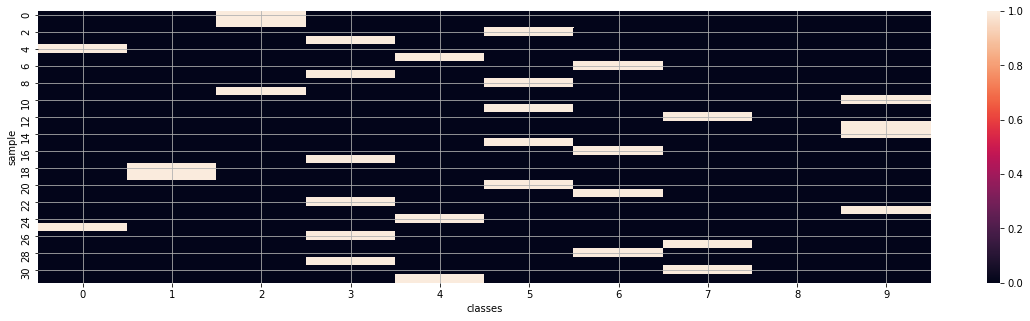

In [41]:
# This representation is called as one hot encoding
import seaborn as sns
plt.figure(figsize=(20,5))
sns.heatmap(ytrain)
plt.grid()
plt.ylabel('sample')
plt.xlabel('classes')

In [42]:
# You can see each sample has only one class 

In [43]:
# So Now we have our data
# We understand something about our data
# We will now move to convolutional neural network

## STEP 2: Create a Model 

In [44]:
# Let us talk  about convolution neural network first
# https://cs231n.github.io/convolutional-networks/
# You may review class lectures first 
# Above link can be helpful for you
# Try to understand following gif
# Input volume is our image, however the size here is just H x W x C, (height x width x channel) so assume this as a case for batch_size = 1

![Convolution Process](https://userweb.cs.txstate.edu/~k_b459/convlotuion.gif)

In [45]:
# Now let us do some practical approach
# Let us begin by examining convolution layer

In [46]:
layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(7,7), strides=2, activation='relu', input_shape=(224,224,3))

In [47]:
out = layer(xtrain)
out.shape, xtrain.shape

(TensorShape([32, 109, 109, 64]), (32, 224, 224, 3))

Input size (224, 224, 3)
Output size  (109, 109, 64)


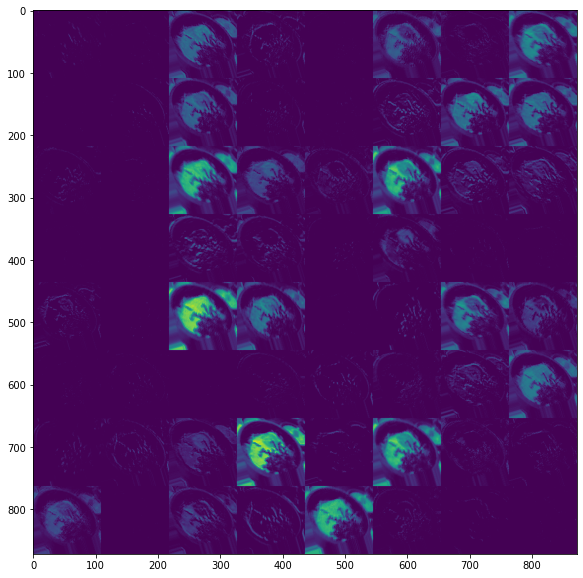

In [48]:
# lets see what happens to our first image
imageindex = 0 #First image
firstout = out[imageindex].numpy()
print('Input size', xtrain[0].shape)
print('Output size ',firstout.shape)

grid = []
for ind, i in enumerate(range(8,72,8)):
  grid.append(np.concatenate([firstout[:,:,j] for j in range(ind*8,ind*8+8)],1))
plt.figure(figsize=(10,10))
plt.imshow(np.concatenate(grid,0))

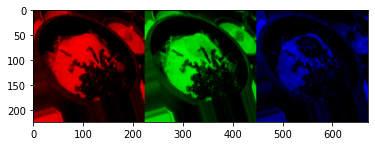

In [49]:
# Above visualization shows our 64 channels output from first convolution layer
# To make comparision with initial discussion about nature of data
# You can simply say our 'R','G','B' is now converted to above output
plt.imshow(np.concatenate([red,green,blue],1))

In [50]:
# Now let us make more comparision with this convolution layer with our example in given gif file
# Try to understand following comparision

# In example gif, Kernel has dimension of 3 by 3, ours has dimension 7 by 7
# In example gif, Kernel has two weights have 64 weights
# In example gif, input channel of image is 1, we have input channel as 3
# In example gif, used padding, we haven't used padding
# In example gif, input size is (1 x 5 x 5 x 1) that is one image, 5 height, 5 dimension and 1 color channel
                  # our has input (32, 214, 214, 3) that is 32 image, 214 height, 214 dimension and 3 color channel

# In example gif, dimension of kernel weight is (3, 3, 1, 2) that means, (3-> height, 3->weight, 1->input channel, 2-> output channel)
# In our example (7, 7, 3, 64), that means, (7-> height, 7->weight, 3->input channel, 64-> output channel)
w,b = layer.get_weights()
print(w.shape)

# In example gif, stride is 1, our case stride is 2, means we move kernel along side x and y direction with 2 steps at once
# In example gif, output is simply convolution but in our case output is followed by activation called as relu 
# Please follow lecture notes to understand about activation layers 
# Basic structure of convolution net will be 
# CONV - ACTIVATION -POOLING- CONV - ACTIVATION -POOLING- CONV - ACTIVATION ----------FLATTEN - DENSELAYER

# So we will follow above approach and try to create a simple model 

(7, 7, 3, 64)


**TASK1.1 : Create a Convolutional Neural Network | SCORE = 10**

In [51]:


# Now Follow following example from tensorflow
# https://www.tensorflow.org/tutorials/images/cnn
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

# YOU ARE FREE TO CHOSE ANY TYPE OF ARCHITECTURE AS LONG AS IT WORKS
# Note: It is important to specify the correct input_shape in the first network
# layer to handle the deminsionality of the input.

# Keras model documentation: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model
# Keras model example: https://www.tensorflow.org/tutorials/images/cnn

# SOLUTION
model = models.Sequential()
model.add(layers.Conv2D(filters = 64, kernel_size = (7, 7), activation = 'relu', 
                        input_shape = (224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size= (7, 7), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (7, 7), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

**TASK1.2 : Print model summary and answer questions | SCORE = 10**

In [52]:
##
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 218, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 103, 103, 64)      200768    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 51, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 64)        200768    
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [53]:
'''
Answer the questions:
1) How many convolutional layers in your model, what are their kernel, filter sizes? 
2) What does max_pooling layer do? 
3) How many output classes in your model? 
'''

'''
Your answer goes here: 
1. 3 convolutional layers, kernel size of 7 and a filter size of 64
2. Max_pooling contains the most prominent features from the feature map
3. 8 output classes 
'''

'\nYour answer goes here: \n1. 3 convolutional layers, kernel size of three and a filter size of 3 \n2. Max_pooling contains the most prominent features from the feature map\n3. 8 output classes \n'

## STEP 3: Train the model

**TASK1.3 : Compile the model | SCORE = 10**

In [54]:
# Keras complile method documentation: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model#compile
# Keras compile example: https://www.tensorflow.org/tutorials/images/cnn

# NOTE: Use CategoricalCrossentropy instead of SparseCategoricalCrossentropy as loss

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])


**Task1.4: Fit the model | SCORE = 10**

In [55]:
# Keras fit method documentation: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model#fit
# Keras compile example: https://www.tensorflow.org/tutorials/images/cnn

# Specify the following parameters:
# 1. The training data x: In this case the genarated train_data_gen will be used as our training set.
# 2. The training labels y: DO NOT SPECIFY. According to the Keras documentation:
#    "If x is a dataset, generator, or keras.utils.Sequence instance, y should not be specified (since targets will be obtained from x)."
# 3. The number of epochs: Let's use 10 epochs. More epochs could posibly yield a better accuracy, but the training takes a while to run.
# 4. The validation_data: For validation we can use the generated test_data_gen.
# 5. The validation_steps: This parameter specifies total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
#    To speed up training let's limit our validation steps to VALIDATION_STEPS = np.ceil(1000 / BATCH_SIZE).
# 6. The steps_per_epoch: Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
#    Earlier, we calculated STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE). Let's use that constant here.

# Note: this can take a while to run. It took about 135 seconds per epoch when I ran it.
VALIDATION_STEPS = np.ceil(1000 / BATCH_SIZE)

history = model.fit(train_data_gen, epochs = 10, validation_data = test_data_gen, 
                    validation_steps = VALIDATION_STEPS, steps_per_epoch = 
                    STEPS_PER_EPOCH)

Epoch 1/10
282/282 [==============================] - 106s 366ms/step - loss: 8.0663 - accuracy: 0.0998 - val_loss: 9.3163 - val_accuracy: 0.1000
Epoch 2/10
282/282 [==============================] - 102s 362ms/step - loss: 9.5050 - accuracy: 0.0994 - val_loss: 9.3163 - val_accuracy: 0.1000
Epoch 3/10
282/282 [==============================] - 102s 362ms/step - loss: 9.4042 - accuracy: 0.1026 - val_loss: 9.3163 - val_accuracy: 0.1000
Epoch 4/10
282/282 [==============================] - 102s 362ms/step - loss: 9.4996 - accuracy: 0.0999 - val_loss: 9.3163 - val_accuracy: 0.1000
Epoch 5/10
282/282 [==============================] - 102s 362ms/step - loss: 9.2169 - accuracy: 0.1016 - val_loss: 9.3163 - val_accuracy: 0.1000
Epoch 6/10
282/282 [==============================] - 103s 364ms/step - loss: 9.3500 - accuracy: 0.0991 - val_loss: 9.3163 - val_accuracy: 0.1000
Epoch 7/10
282/282 [==============================] - 102s 362ms/step - loss: 9.4780 - accuracy: 0.1021 - val_loss: 9.3163 -

## STEP 4: Model evaluation

**Task1.5: Evaluate the model | SCORE = 10**

In [56]:
# Part 1: Use the method evaluate to evaluate your model on the test set and print evaluation accuracy.
# Keras evaluate method documentation: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model#evaluate
#
# Specify the following parameters:
# 1. The test data x: In this case the genarated test_data_gen will be used as our test set.
# 2. The number of steps: Total number of steps (batches of samples) before declaring the evaluation round finished.
#    We can limit the number of steps to VALIDATION_STEPS to speed up evaluation.

score = model.evaluate(test_data_gen, steps = VALIDATION_STEPS)
print(score)

32/32 [==============================] - 2s 47ms/step - loss: 9.3163 - accuracy: 0.1000
[9.316261291503906, 0.10000000149011612]


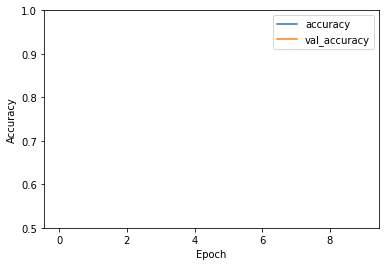

In [57]:
# Part 2: Plot a graph showing the training and validation accuracies in each epoch.
# Example: https://www.tensorflow.org/tutorials/images/cnn

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()


# RECURENT NEURAL NETWORK (Natural Language Processing - Text Classification)

We will see and example of using and LSTM RNN to perform text classification.
In particular, we will classify tweets as positive or negative based on their sentiment. For that we will used an existing publically availalbe datasets of 1.6 million tweets (cleaned_tweets_1point6_million.csv).
The dataset has already been cleaned of punctuation marks and emojis and only the roots of each word have been kept.
We will only used a subset of the whole dataset to speed up our experiment.

In [58]:
import pandas as pd

df = pd.read_csv('cleaned_tweets_1point6_million.csv')
df.dropna(inplace=True)

In [59]:
# Our tweets trainings set has two labels with values 0 (negative) and 4 (positive) sentiment
# This is because the original dataset has other classes as well (e.g. 2 for neutral) which we will not use
# We will convert the labels to 0, 1 
# This section also includes further cleaning process
df.labels = df.labels.apply(lambda x:int(x==4))
df.tweets = df.tweets.apply(lambda x:x.strip())
df = df[~(df.tweets =='')]

In [60]:
# Let us see the count of max words per tweet
df_num_words_df = sorted(df.tweets.apply(lambda x:len(x.split())).values)
print(f'df tweets has max words {max(df_num_words_df)}')
print(f'df tweets has min words {min(df_num_words_df)}')

df tweets has max words 38
df tweets has min words 1


In [61]:
"""
WARNING : IN REAL WORLD YOU WILL NOT FIND CLEAN DATASETS
YOU CAN FOLLOW FOLLOWING PIPELINE TO WORK WITH REAL WORLD TEXT DATA
# tweets have un-necessary characters first get rid of them

# We will use following library
# https://pypi.org/project/clean-text/
!pip install unidecode
!pip install cleantext


import cleantext
import nltk
nltk.download('stopwords')
# We will not remove stop-words
# Please do some google search to study about effects of stop words in different cases
df.loc[:,'tweets'] = df.tweets.apply(lambda x:cleantext.clean(x,all=True, stopwords=False))

BUT WE HAVE ALREADY DONE ALL THOSE FOR YOU
"""
print()

In [62]:
import numpy as np
# Let us take only 10% of df to create our data set namely 'sample'
np.random.seed(4347)
sample = df.sample(int(0.1*len(df)))

In [63]:
len(sample)

143965

In [64]:
# Lets see few 10 lines of tweets
sample.head(10)

,labels,tweets
207370,0,moefugg what wrong
444899,0,gr monkeysmus play within walk distanc hous sa...
818844,1,heyb cabbrock thank good
1030036,1,summer girl stereo addict song love
988752,1,yipcoyot oh wow yum
238852,0,tdiggiti dont chang ur pic yet tho twitter sti...
710018,0,sowrongitsbec blow im sorri dont money anyth e...
266897,0,alrightmousey suppos book design cover illustr...
1257424,1,cjmal anytim anyth return favor like sort thin...
1289995,1,beespac transmiss live bioni samp djing stream...


In [65]:
# Lets see our unique labels
sample.labels.unique()

array([0, 1])

In [66]:
# 0 represents negative sentiment
# 1 represents positive sentiment

print('train : label size', f'positive {(sample.labels==0).sum()}, negative {(sample.labels==1).sum()}')

train : label size positive 71985, negative 71980


In [67]:
import tensorflow as tf
import numpy as np

In [68]:
# Now we will create a dataloader
datagen = tf.data.Dataset.from_tensor_slices((sample.tweets,sample.labels))

In [69]:
# NOW COMES THE IMPORTANT PART
# HOW DO I CONVERT THESE TEXT REPRESENTATION TO TENSOR REPRESENTATION
# Machine learning models work on numbers, not words, so the string values need 
# to be converted into lists of numbers. To do that, map each unique word to a unique integer.
# For this we will follow the process explained in this page:
# https://www.tensorflow.org/tutorials/load_data/text

import tensorflow_datasets as tfds


In [70]:
# Let us create a tokenizer
tokenizer = tfds.deprecated.text.Tokenizer()
vocabulary_set = set()
for text_tensor in sample.tweets.values:
  some_tokens = tokenizer.tokenize(text_tensor)
  vocabulary_set.update(some_tokens)

vocab_size = len(vocabulary_set)
# How many unique words do we have?
vocab_size

125053

In [71]:
# Now we will create our encoder
# This encoder will encode text to numbers
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [72]:
# Lets see encoder in action
sampletweet = sample.tweets.values[0]
encodedtweet = encoder.encode(sample.tweets.values[0])
decodedtweet = encoder.decode(encodedtweet)
print(f'sample tweet : \n{sampletweet}')
print(f'encode tweet : \n{encodedtweet}')
print(f'decode tweet : \n{decodedtweet}')

sample tweet : 
moefugg what wrong
encode tweet : 
[89976, 35815, 85441]
decode tweet : 
moefugg what wrong


In [73]:
N = len(sample)

In [74]:
# The following shows a pipeline to encode our text data to number(which are indices in embedding matrix)

# You don't have to worry about understanding these functions for now, but we need them
def encode(text_tensor, label):
  encoded_text = encoder.encode(text_tensor.numpy())
  return encoded_text, label

def encode_map_fn(text, label):
  # py_func doesn't set the shape of the returned tensors.
  encoded_text, label = tf.py_function(encode, 
                                       inp=[text, label], 
                                       Tout=(tf.int64, tf.int64))

  # `tf.data.Datasets` works best if all components have a shape set
  #  so set the shapes manually: 
  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label



# Now let us map datagenerator to encode_map_fn
sample_map = datagen.map(encode_map_fn)


# Now we will break our sample_map to train and test (90% and 10%)
train_data = sample_map.skip(int(N * 0.9))
train_data = train_data.padded_batch(50, padded_shapes=([None],[]))

test_data = sample_map.take(int(N * 0.1))
test_data = test_data.padded_batch(50, padded_shapes=([None],[]))

In [75]:
# Please note that our training size is 
training_size = int(N * 0.9)
testing_size = int(N * 0.1)
print(f'training_size\t: {training_size}\ntesting_size\t: {testing_size}')

training_size	: 129568
testing_size	: 14396


In [76]:
# Now let us see our first batch (size = 50) of train_data
train_examples_batch, train_labels_batch = next(iter(train_data))

In [77]:
train_examples_batch.shape

TensorShape([50, 15])

In [78]:
# Let us see corresponding labels
train_labels_batch

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0])>

In [79]:
# Let's see our first test batch
test_examples_batch, test_labels_batch = next(iter(test_data))
test_examples_batch.shape

TensorShape([50, 17])

In [80]:
test_labels_batch

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0])>

In [81]:
test_examples_batch.shape

TensorShape([50, 17])

In [82]:
# The hard part is done, we are able to convert our first 50 tweets
# to a tensor of dimension 50

**TASK2.1 : Create a Recurrent Neural Network | SCORE = 10**

In [84]:
# Now we will follow an example from 
# https://www.tensorflow.org/tutorials/text/text_classification_rnn

# You will find following definition of models in above example
# 
# To create a recurrent neural network:
# Use at least 2 lstm layer
# use at least 2 dense layer(including last layer)
# You are welcome to modify the model way you want but must meet above requirements
# Please do not make extremely large model that will be a big problem and will take a longer time

"""
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000000,output_dim=64)
    
    -----
    ----- USE LSTM LAYER HERE  | HINT : see. part where you are taught to create two or more lstm layers
  

    ----- [following 2 or more optional layers]


    ----- YOU CAN USE DROPOUT LAYER HERE, this can make your model better(optional)
    ----- USE DENSE LAYER THAT PRODUCE 128 DIMENSION
    ----- USE DENSE LAYER THAT PRODUCE 64 DIMENSION

    tf.keras.layers.Dense(1)
])
"""
print()

# Our model may not work as expected you are welcome to explore techniques like dropout
# Add more layers and other experiment


# SOLUTION
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000000,output_dim=64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [85]:
# Following is the output size of our model and compared with the labels shape
# Both of them have same shape [50,1] and [50] which is same
model(train_examples_batch).shape, train_labels_batch.shape

(TensorShape([50, 1]), TensorShape([50]))

**TASK2.2 : Report model summary and answer questions | SCORE = 10**

In [86]:
###
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 64,090,881
Trainable params: 64,090,881
Non-trainable params: 0
__________________________________________

In [87]:
'''
Answer the following questions: 
1) What does embedding layer do? 
2) What does Dropout layer do? 
3) How many output classes your model has? 
'''

'''
Your answer goes here: 
1. Looks up the embedding vector for each index given for each input
2. Randomly sets inputs to 0 to help prevent overfittig
3. 5 output classes

'''

'\nYour answer goes here: \n1. Looks up the embedding vector for each index given for each input\n2. Randomly sets inputs to 0 to help prevent overfittig\n3. 5 output classes\n\n'

**TASK2.3 : Compile the model | SCORE = 10**

In [88]:
# Follow the link https://www.tensorflow.org/tutorials/text/text_classification_rnn
# Compile your model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

**TASK2.4 : Fit the model | SCORE = 10**

In [89]:
#Train your model
# Don't train with too many epochs considering time expended, give epochs = 5 or 10 is enough. 
history = model.fit(train_data, epochs = 10, validation_data = test_data, validation_steps = 30)

Epoch 1/10
288/288 [==============================] - 199s 574ms/step - loss: 0.6927 - accuracy: 0.5086 - val_loss: 0.6870 - val_accuracy: 0.5180
Epoch 2/10
288/288 [==============================] - 194s 569ms/step - loss: 0.6555 - accuracy: 0.5408 - val_loss: 0.5496 - val_accuracy: 0.7113
Epoch 3/10
288/288 [==============================] - 195s 569ms/step - loss: 0.4864 - accuracy: 0.7646 - val_loss: 0.5463 - val_accuracy: 0.7227
Epoch 4/10
288/288 [==============================] - 195s 569ms/step - loss: 0.3869 - accuracy: 0.8343 - val_loss: 0.5914 - val_accuracy: 0.7120
Epoch 5/10
288/288 [==============================] - 195s 569ms/step - loss: 0.2947 - accuracy: 0.8857 - val_loss: 0.6799 - val_accuracy: 0.7107
Epoch 6/10
288/288 [==============================] - 194s 569ms/step - loss: 0.2187 - accuracy: 0.9246 - val_loss: 0.7955 - val_accuracy: 0.6967
Epoch 7/10
288/288 [==============================] - 195s 570ms/step - loss: 0.1667 - accuracy: 0.9476 - val_loss: 0.9133 -

**TASK2.5 : Evaluate the model | SCORE = 10**

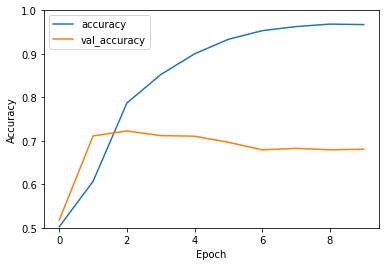

In [90]:
# Plot the training and validation accuracy over each epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()